In [1]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import fitstools
from pathlib import PurePath
import glob
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from astropy.io.fits import getheader
from balltracking import mballtrack as mblt
# from cython_modules import interp

plt.rcParams.update({'font.size': 12})
dpi = 168

In [2]:
%matplotlib widget

In [3]:
# Data prepped by COR2_tracking_prep.ipynb
datadir = PurePath('C:\Data\STEREO\L7tum\prep_fits')
outputdir = PurePath('C:\Data\STEREO\L7tum\\figures')
datafiles = sorted(glob.glob(str(PurePath(datadir, '*.fits'))))
nfiles = len(datafiles)
nfiles2 = 200
print(nfiles, datafiles[0])

200 C:\Data\STEREO\L7tum\prep_fits\prep_0000.fits


In [4]:
DTYPE = np.float32
def prep_data(image):
    image2 =np.abs(image)
    image3 = image2.max() - image2
    surface = (image3 - image3.mean())/image3.std()
    return surface.copy(order='C').astype(DTYPE)

Show a sample image

(659, 3600)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
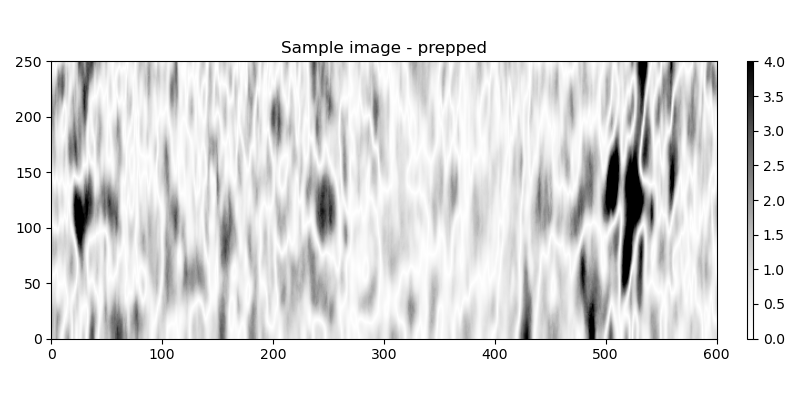

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
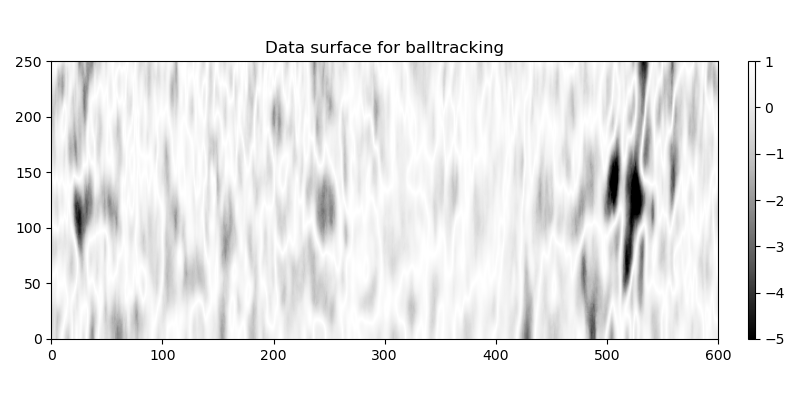

In [5]:
sample = np.abs(fitstools.fitsread(datafiles[0], cube=False, astropy=True))
print(sample.shape)
surface = prep_data(sample)

vmin = 0
vmax = 4

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)
axs.set_xlim([0, 600])
axs.set_ylim([0, 250])
axs.set_title('Sample image - prepped')
plt.tight_layout()

vmin = -5
vmax = 1
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
im = axs.imshow(surface, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys_r')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)
axs.set_xlim([0, 600])
axs.set_ylim([0, 250])
axs.set_title('Data surface for balltracking')
plt.tight_layout()

nballs_max = 1186200


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
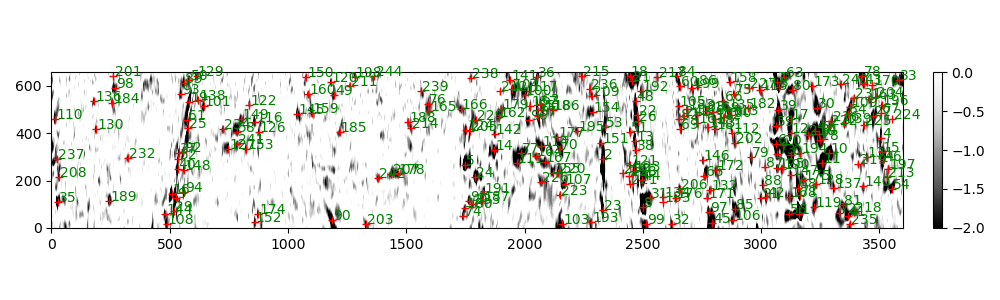

In [78]:
plt.close('all')
mbt_dict = {"nt":80,
            "rs":4,
            "am":2,
            "dp":0.3,
            "tdx":1,
            "tdy":100,
            "zdamping":1,
            "ballspacing":15,
            "intsteps":30,
            "mag_thresh":3.5,
            "noise_level":2,
            "track_emergence":True,
            "emergence_box": 15,
            "prep_function":prep_data,
            "datafiles":datafiles,
            "do_plots":False,
            "astropy":True,
            "verbose":True,
            "outputdir":datadir,
            "fig_dir":PurePath(datadir, 'figures')}

# mbt_p, mbt_n = mblt.mballtrack_main(**mbt_dict)

mbt = mblt.MBT(polarity=1, **mbt_dict)


fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10,3))
im = axs.imshow(mbt.surface, vmin = -2, vmax=0, origin='lower', cmap='Greys_r')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)

axs.plot(mbt.xstart, mbt.ystart, 'r+')
labels = np.arange(0, mbt.nballs)
labels_str = [str(l) for l in labels]
for i, l in enumerate(labels_str):
    axs.text(mbt.xstart[i]+5, mbt.ystart[i], l, color='green', fontsize=10)

plt.tight_layout()
# bmask = mbt.ystart <= 300
# axs.plot(mbt.xstart[bmask], mbt.ystart[bmask], 'co', ms=10, markerfacecolor='none')

In [7]:
# select_balls = [9, 16, 29, 35, 94, 108, 189, 232]

In [79]:
mbt.track_all_frames()

Tracking with 245 initial balls
Frame n=0: C:\Data\STEREO\L7tum\prep_fits\prep_0000.fits
Frame n=1: C:\Data\STEREO\L7tum\prep_fits\prep_0001.fits
Frame n=2: C:\Data\STEREO\L7tum\prep_fits\prep_0002.fits
Frame n=3: C:\Data\STEREO\L7tum\prep_fits\prep_0003.fits
Frame n=4: C:\Data\STEREO\L7tum\prep_fits\prep_0004.fits
Frame n=5: C:\Data\STEREO\L7tum\prep_fits\prep_0005.fits
Frame n=6: C:\Data\STEREO\L7tum\prep_fits\prep_0006.fits
Frame n=7: C:\Data\STEREO\L7tum\prep_fits\prep_0007.fits
Frame n=8: C:\Data\STEREO\L7tum\prep_fits\prep_0008.fits
Frame n=9: C:\Data\STEREO\L7tum\prep_fits\prep_0009.fits
Frame n=10: C:\Data\STEREO\L7tum\prep_fits\prep_0010.fits
Frame n=11: C:\Data\STEREO\L7tum\prep_fits\prep_0011.fits
Frame n=12: C:\Data\STEREO\L7tum\prep_fits\prep_0012.fits
Frame n=13: C:\Data\STEREO\L7tum\prep_fits\prep_0013.fits
Frame n=14: C:\Data\STEREO\L7tum\prep_fits\prep_0014.fits
Frame n=15: C:\Data\STEREO\L7tum\prep_fits\prep_0015.fits
Frame n=16: C:\Data\STEREO\L7tum\prep_fits\prep_00

In [ ]:
# np.savez_compressed(PurePath('C:/Data/STEREO/L7tum/prep_fits/balltrack/mblt.npz', ballpos=ballpos, )

In [81]:
# Remove the balls that are only here for their 1st frame - use ballage!
ballpos = mbt.ballpos.copy()
ballpos[ballpos == -1] = np.nan

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
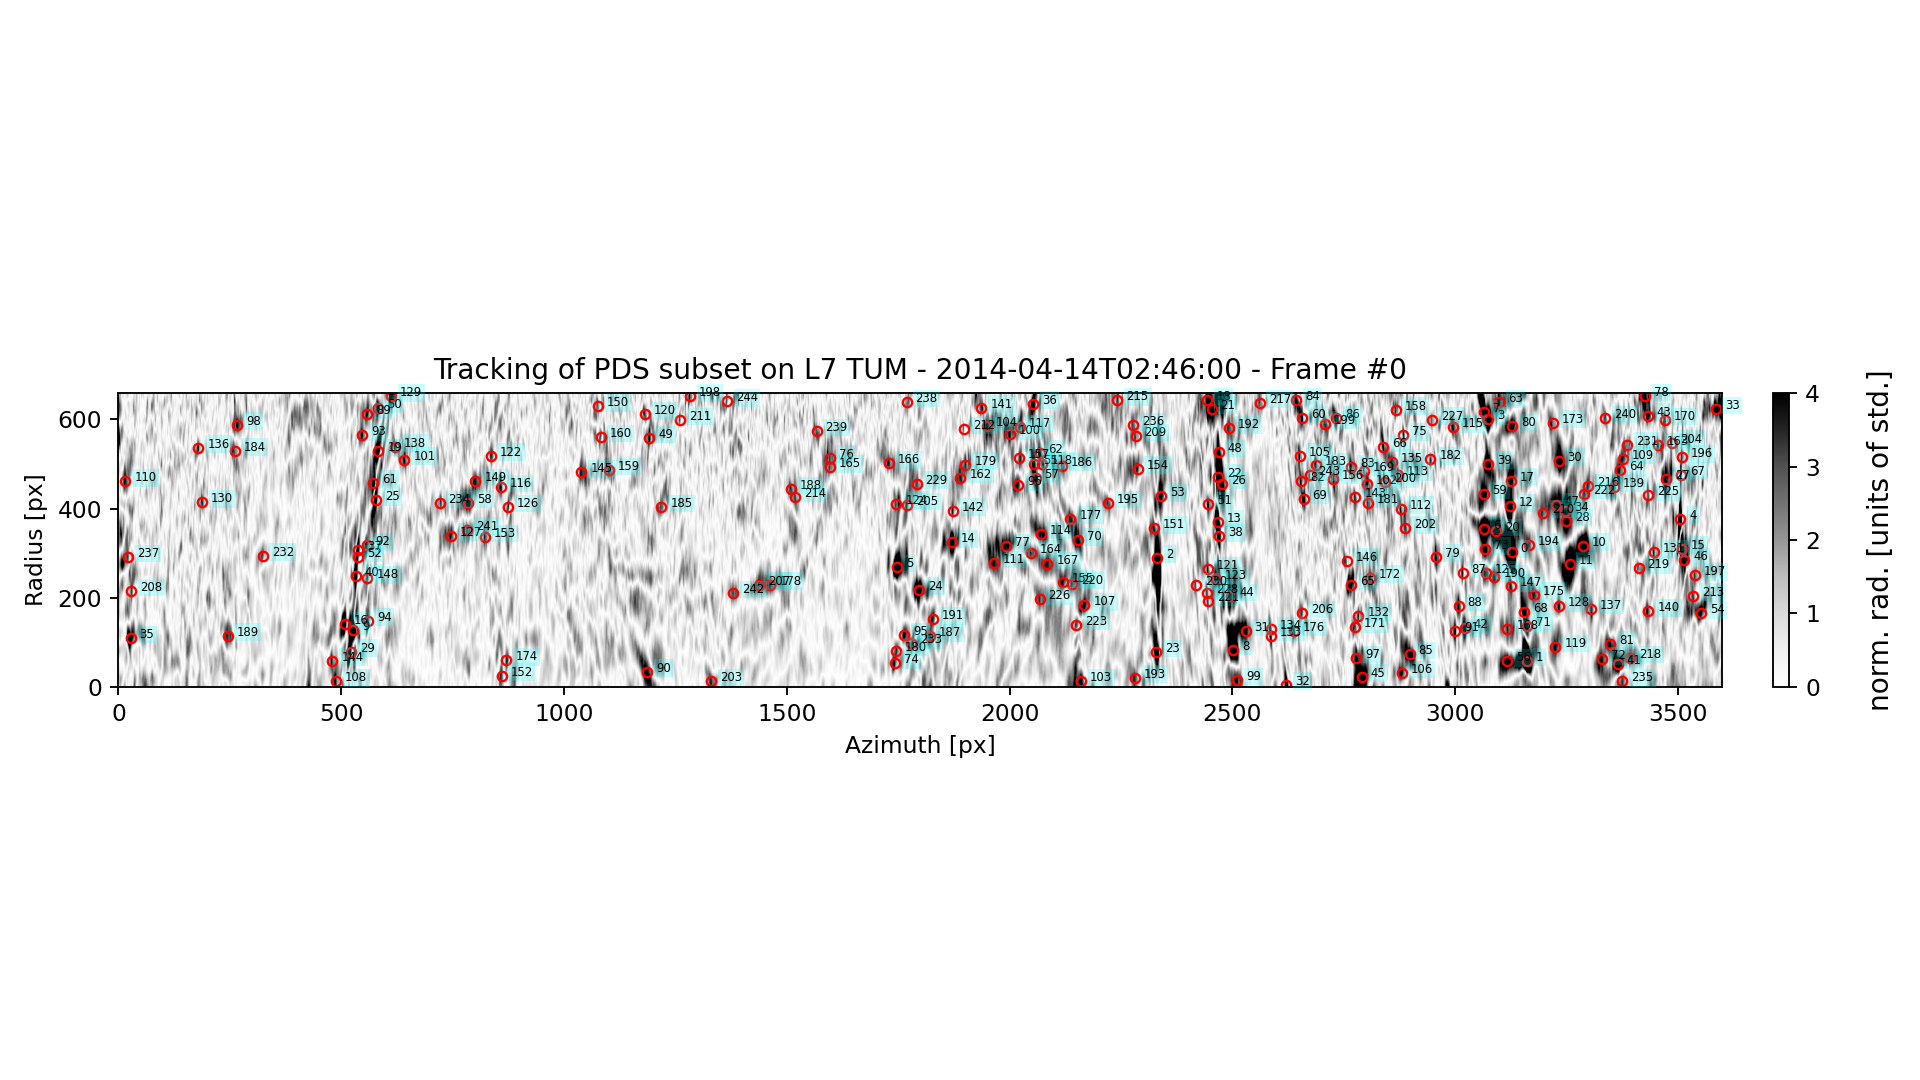

In [82]:
plt.close('all')
vmin = 0
vmax = 4
datafiles0 = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum','*.fts.gz'))))


for i in range(0, 1):

    sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
    _, hdr = fitstools.fitsread(datafiles0[i], cube=False, astropy=True, header=True)
    surface = prep_data(sample)

    fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(1920/dpi, 1080/dpi), dpi=dpi)
    im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
    # position for the colorbar
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(im, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=12, labelpad=20)
    # axs.plot(mbt.ballpos[0,b,i], mbt.ballpos[1,b,i], 'r+')
    axs.plot(ballpos[0,:,i], ballpos[1,:,i], 'ro', ms=4, markerfacecolor='none')
    for ball, l in enumerate(labels_str):
        if np.isfinite(ballpos[0, ball, i]):
            axs.text(ballpos[0, ball, i]+20, ballpos[1, ball, i], l, color='black', fontsize=5, bbox=dict(facecolor='cyan', alpha=0.2, edgecolor='none', pad=1))

    axs.set_xlim([0, 3600])
    axs.set_ylim([0, 659])
    date_obs = hdr['DATE-OBS'][:-4]
    axs.set_title(f'Tracking of PDS subset on L7 TUM - {date_obs} - Frame #{i}', fontsize=12)
    axs.set_xlabel('Azimuth [px]')
    axs.set_ylabel('Radius [px]')
    
    plt.tight_layout()

    # fig.savefig(PurePath(outputdir, f'Balltrack_V2_emergence_L7tum_{i:04d}.jpg'), dpi=dpi) #
    # plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
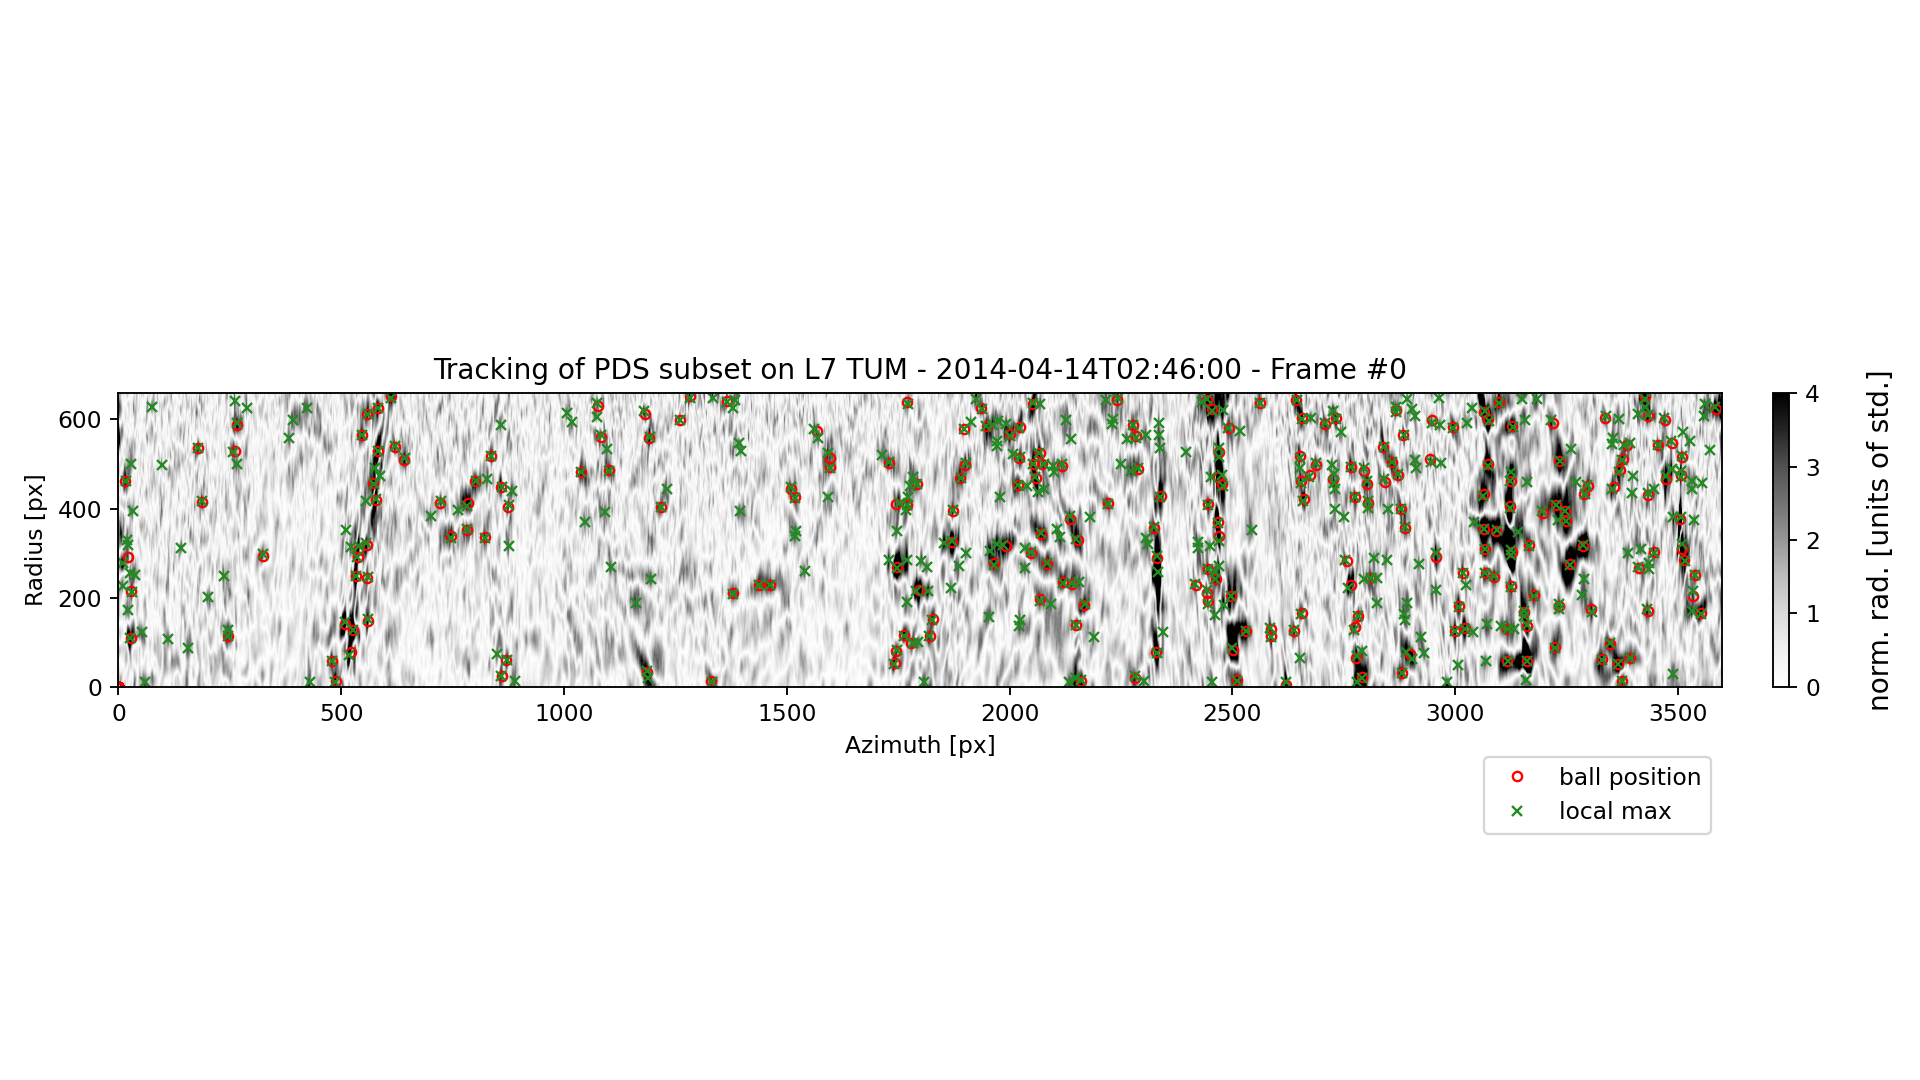

In [83]:
plt.close('all')
vmin = 0
vmax = 4
datafiles0 = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum','*.fts.gz'))))

for i in range(0, 1):

    sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
    _, hdr = fitstools.fitsread(datafiles0[i], cube=False, astropy=True, header=True)
    surface = prep_data(sample)
    
    xmax, ymax = mblt.get_local_extrema(sample, 1, 10, 3)

    fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(1920/dpi, 1080/dpi), dpi=dpi)
    im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
    # position for the colorbar
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(im, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=12, labelpad=20)
    # axs.plot(mbt.ballpos[0,b,i], mbt.ballpos[1,b,i], 'r+')
    axs.plot(mbt.ballpos[0,:,i], mbt.ballpos[1,:,i], 'ro', ms=4, markerfacecolor='none', label='ball position')
    # for ball, l in enumerate(labels_str):
    #     axs.text(mbt.ballpos[0, ball, i]+5, mbt.ballpos[1, ball, i], l, color='green')
    
    # Plot local max
    axs.plot(xmax, ymax, marker='x', ls='none', color='forestgreen', ms=4, label='local max')

    axs.set_xlim([0, 3600])
    axs.set_ylim([0, 659])
    date_obs = hdr['DATE-OBS'][:-4]
    axs.set_title(f'Tracking of PDS subset on L7 TUM - {date_obs} - Frame #{i}', fontsize=12)
    axs.set_xlabel('Azimuth [px]')
    axs.set_ylabel('Radius [px]')
    axs.legend(bbox_to_anchor=(1, -0.2))
    
    plt.tight_layout()

    # fig.savefig(PurePath(outputdir, f'Balltrack_local_max_L7tum_{i:04d}.jpg'), dpi=dpi) #
    # plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
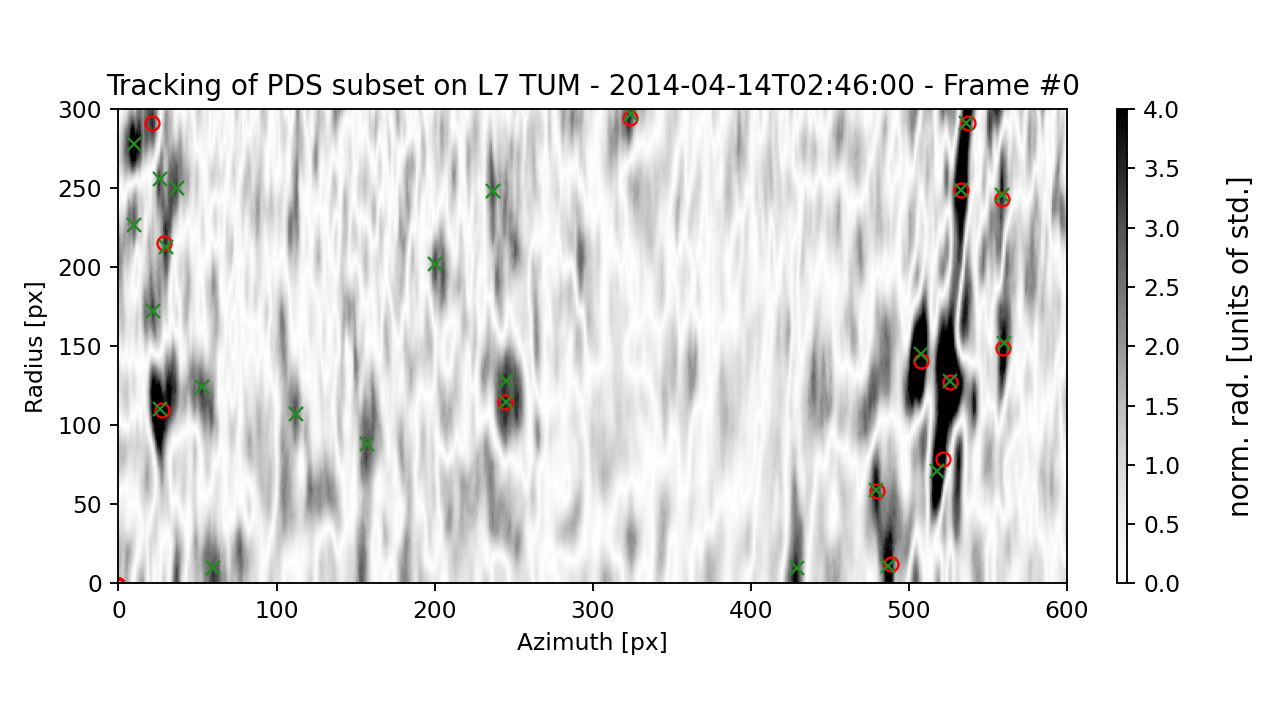

In [84]:
plt.close('all')
vmin = 0
vmax = 4
datafiles0 = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum','*.fts.gz'))))

for i in range(0, 1):

    sample = np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))
    _, hdr = fitstools.fitsread(datafiles0[i], cube=False, astropy=True, header=True)
    surface = prep_data(sample)
    
    xmax, ymax = mblt.get_local_extrema(sample, 1, 10, 3)

    fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(1280/dpi, 720/dpi), dpi=dpi)
    im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
    # position for the colorbar
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(im, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=12, labelpad=20)
    # axs.plot(mbt.ballpos[0,b,i], mbt.ballpos[1,b,i], 'r+')
    axs.plot(mbt.ballpos[0,:,i], mbt.ballpos[1,:,i], 'ro', ms=6, markerfacecolor='none', label='ball position')
    # for ball, l in enumerate(labels_str):
    #     axs.text(mbt.ballpos[0, ball, i]+5, mbt.ballpos[1, ball, i], l, color='green')
    
    # Plot local max
    axs.plot(xmax, ymax, marker='x', ls='none', color='forestgreen', ms=6, label='local max')

    axs.set_xlim([0, 600])
    axs.set_ylim([0, 300])
    date_obs = hdr['DATE-OBS'][:-4]
    axs.set_title(f'Tracking of PDS subset on L7 TUM - {date_obs} - Frame #{i}', fontsize=12)
    axs.set_xlabel('Azimuth [px]')
    axs.set_ylabel('Radius [px]')
    # axs.legend(bbox_to_anchor=(1, -0.2))
    
    plt.tight_layout()

    # fig.savefig(PurePath(outputdir, f'Zoom_Balltrack_local_max_L7tum_{i:04d}.jpg'), dpi=dpi) #
    # plt.close()

In [108]:
DSUN_OBS= 1.433675e6 # km
DT = 5*60 # 5 minutes time interval between each frame
CDELT2  = 0.0141875720451562 # solar radius / px
VUNIT = CDELT2 * (DSUN_OBS/2)/DT 
duration = round(mbt_dict['nt']*5)/60

Calculate velocity profiles

In [183]:
# Remove the balls that are only here for their 1st frame - use ballage!
ballpos = mbt.ballpos.copy()
ballpos[ballpos == -1] = np.nan
keep_tracks_mask = mbt.balls_age_t[:, -1] >= 5
ballpos = ballpos[:, keep_tracks_mask, :]

labels = np.arange(0, ballpos.shape[1])
labels_str = [str(l) for l in labels]

In [184]:
px = 0.5*(ballpos[0,:,0:-1] + ballpos[0,:,1:])
py = 0.5*(ballpos[1,:,0:-1] + ballpos[1,:,1:])
vx = (ballpos[0,:,1:] - ballpos[0,:,0:-1])*VUNIT
vy = (ballpos[1,:,1:] - ballpos[1,:,0:-1])*VUNIT
# Eliminate backtracks
vy[vy<0] = np.nan
nan_balls_mask = np.all(np.isnan(vy), axis=1)
keep_balls_mask = np.logical_not(nan_balls_mask)
px = px[keep_balls_mask, :]
py = py[keep_balls_mask, :]
vx = vx[keep_balls_mask, :]
vy = vy[keep_balls_mask, :]

Average each ball velocity over time

In [185]:
vy_tavg = np.nanmean(vy, axis=1)
vy_tstd = np.nanstd(vy, axis=1)
px_tavg = np.nanmean(px, axis=1)
px_tavg.shape, vy_tavg.shape

((2062,), (2062,))

In [186]:
np.nanmean(np.nanmean(vy, axis=0)), np.nanmean(np.nanmean(vy, axis=1))

(208.09952, 189.10156)

### Structure and aggregate the data in Pandas DataFrame. 

In [187]:
import pandas as pd
# import pandas.DataFrame
d = {'px_tavg': px_tavg, 'vy_tavg': vy_tavg}
df = pd.DataFrame(data=d)
df['bins'] = pd.cut(df['px_tavg'], bins=np.arange(0,3600,100), include_lowest=True)
df

,px_tavg,vy_tavg,bins
0,3120.130859,311.615631,"(3100.0, 3200.0]"
1,3150.489014,315.105499,"(3100.0, 3200.0]"
2,2338.688232,247.631409,"(2300.0, 2400.0]"
3,3074.182373,256.265198,"(3000.0, 3100.0]"
4,3492.504639,172.366913,"(3400.0, 3500.0]"
...,...,...,...
2057,328.887238,33.519020,"(300.0, 400.0]"
2058,1123.393311,123.721512,"(1100.0, 1200.0]"
2059,2940.269775,194.183762,"(2900.0, 3000.0]"
2060,1225.007812,187.383957,"(1200.0, 1300.0]"


In [203]:
from scipy.stats import binned_statistic
bin_means, bin_edges, binnumber = binned_statistic(px_tavg, vy_tavg, statistic='mean', bins=np.arange(0,3600,100))

bin_std, _, _ = binned_statistic(px_tavg, vy_tavg, statistic='std', bins=np.arange(0,3600,100))
bin_count, _, _ = binned_statistic(px_tavg, vy_tavg, statistic='count', bins=np.arange(0,3600,100))
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])
bin_intervals[0:10]

IntervalIndex([(0.0, 100.0], (100.0, 200.0], (200.0, 300.0], (300.0, 400.0], (400.0, 500.0], (500.0, 600.0], (600.0, 700.0], (700.0, 800.0], (800.0, 900.0], (900.0, 1000.0]], dtype='interval[float64, right]')

In [189]:
def set_to_midbin(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

df['midbin'] = df['px_tavg'].apply(lambda x: set_to_midbin(x, bin_intervals))
df

,px_tavg,vy_tavg,bins,midbin
0,3120.130859,311.615631,"(3100.0, 3200.0]",3150.0
1,3150.489014,315.105499,"(3100.0, 3200.0]",3150.0
2,2338.688232,247.631409,"(2300.0, 2400.0]",2350.0
3,3074.182373,256.265198,"(3000.0, 3100.0]",3050.0
4,3492.504639,172.366913,"(3400.0, 3500.0]",3450.0
...,...,...,...,...
2057,328.887238,33.519020,"(300.0, 400.0]",350.0
2058,1123.393311,123.721512,"(1100.0, 1200.0]",1150.0
2059,2940.269775,194.183762,"(2900.0, 3000.0]",2950.0
2060,1225.007812,187.383957,"(1200.0, 1300.0]",1250.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
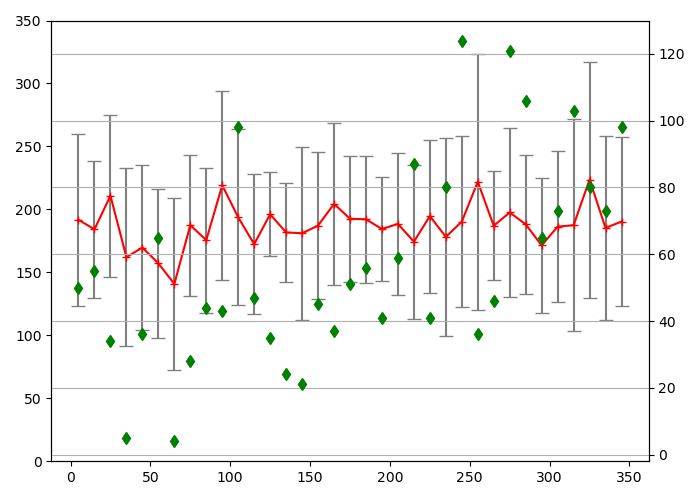

In [211]:
deg_bins = (bin_edges[:-1]+bin_edges[1:])/2/10
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.errorbar(deg_bins, bin_means, yerr=bin_std, fmt='r+-', capsize=5, ecolor='gray')
axs.set_ylim([0, 350])
axs2 = axs.twinx()
axs2.plot(deg_bins, bin_count, 'gd')
axs2.grid()
plt.tight_layout()

In [191]:
l7tumfiles = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum\*.fts.gz'))))
_, hdr = fitstools.fitsread(l7tumfiles[0], cube=False, astropy=True, header=True)

Text(0.7, 0.5, '<Vy> = 209 km/s')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
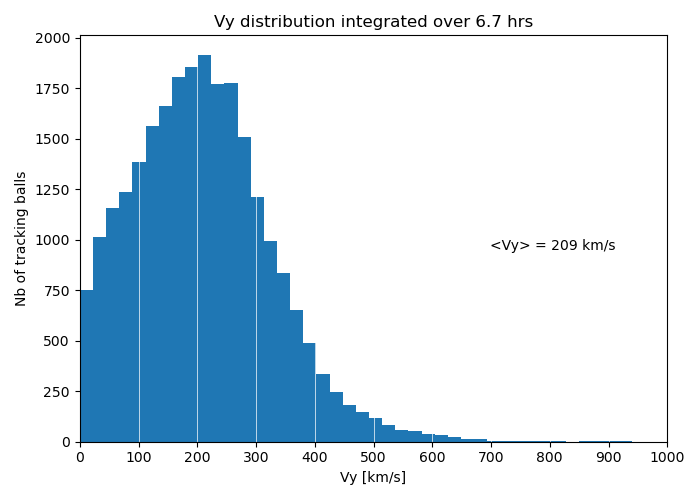

In [194]:
plt.close('all')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.hist(vy.ravel(), bins=50);
axs.set_xlabel('Vy [km/s]')
axs.set_ylabel('Nb of tracking balls')
plt.grid(color='white', lw = 0.5, axis='x')
xticks = np.arange(0,1001, 100)
plt.xticks(xticks);
axs.set_xlim([0, 1000])
axs.set_title(f'Vy distribution integrated over {duration:0.1f} hrs')
plt.tight_layout()
axs.text(0.7, 0.5, f'<Vy> = {np.nanmean(vy):0.0f} km/s', transform=fig.transFigure)

In [195]:
mask_R1 = py < 659/2
mask_R2 = py >= 659/2
mask_X1 = px < 3600/2
mask_X2 = px >= 3600/2

In [200]:
vy_R1 = vy[mask_R1].ravel()
vy_R2 = vy[mask_R2].ravel()
vy_X1 = vy[mask_X1].ravel()
vy_X2 = vy[mask_X2].ravel()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
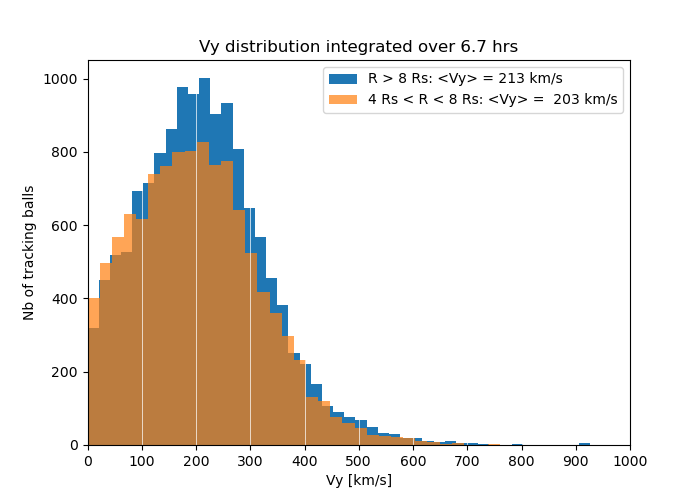

In [201]:
plt.close('all')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.hist(vy_R2, bins=50, label=f'R > 8 Rs: <Vy> = {np.nanmean(vy_R2):0.0f} km/s');
axs.hist(vy_R1, bins=50, label=f'4 Rs < R < 8 Rs: <Vy> =  {np.nanmean(vy_R1):0.0f} km/s', alpha=0.7);
axs.set_xlabel('Vy [km/s]')
axs.set_ylabel('Nb of tracking balls')
plt.grid(color='white', lw = 0.5, axis='x')
xticks = np.arange(0,1001, 100)
plt.xticks(xticks);
axs.set_xlim([0, 1000])
axs.set_title(f'Vy distribution integrated over {duration:0.1f} hrs')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
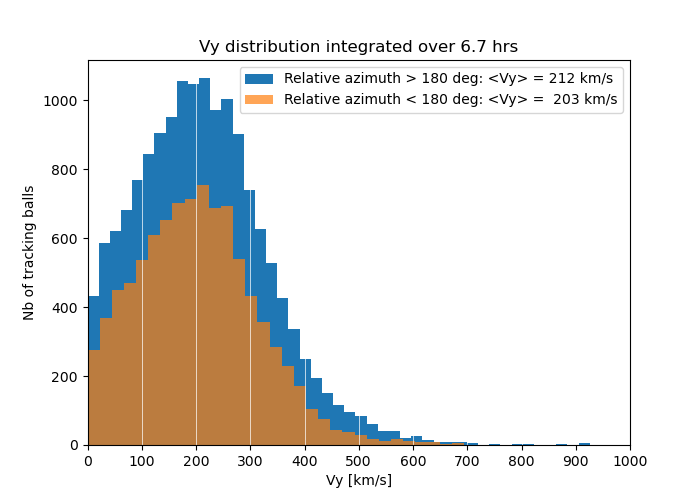

In [202]:
plt.close('all')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.hist(vy_X2, bins=50, label=f'Relative azimuth > 180 deg: <Vy> = {np.nanmean(vy_X2):0.0f} km/s');
axs.hist(vy_X1, bins=50, label=f'Relative azimuth < 180 deg: <Vy> =  {np.nanmean(vy_X1):0.0f} km/s', alpha=0.7);
axs.set_xlabel('Vy [km/s]')
axs.set_ylabel('Nb of tracking balls')
plt.grid(color='white', lw = 0.5, axis='x')
xticks = np.arange(0,1001, 100)
plt.xticks(xticks);
axs.set_xlim([0, 1000])
axs.set_title(f'Vy distribution integrated over {duration:0.1f} hrs')
plt.legend()